#Importing Libraries

In [141]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [142]:
#Loading train file into df
df = pd.read_csv('train.csv')


In [143]:
#Loading train file into df
df_test = pd.read_csv('test.csv')

#Gaining basic Insights from the data and Data Cleansing

The Train data is for 2019 and for the months March, April, May, June

In [144]:
#Reading the top 5 rows of the dataset
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


In [145]:
#Reading bottom 5 rows of the dataset
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8007,Airline A,12/06/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,04:40 13 Jun,22h 10m,1 stop,In-flight meal not included,7594
8008,Airline C,9/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 10 Jun,21h 15m,2 stops,No info,10651
8009,Airline A,3/03/2019,Delhi,Cochin,DEL → BOM → COK,08:00,04:25 04 Mar,20h 25m,1 stop,No info,17024
8010,Airline A,18/05/2019,Delhi,Cochin,DEL → BOM → COK,11:30,12:35 19 May,25h 5m,1 stop,In-flight meal not included,12373
8011,Airline A,9/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,23:35 10 May,27h 10m,1 stop,No info,13067


In [146]:
#Checking the dimensions of the dataset
df.shape

(8012, 11)

In [147]:
#Checking the dimensions of the dataset
df_test.shape

(2671, 10)

In [148]:
#Checking datatypes
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [149]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

Only 1 Numerical Field, 10 Categorical Fields

In [150]:
#checking the Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8012 non-null   object
 1   Date_of_Journey  8012 non-null   object
 2   Source           8012 non-null   object
 3   Destination      8012 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8012 non-null   object
 6   Arrival_Time     8012 non-null   object
 7   Duration         8012 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8012 non-null   object
 10  Price            8012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 688.7+ KB


In [151]:
#checking for null values
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [152]:
#checking for null values
print(df_test.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


only 1 null values present in the dataset we would drop them

In [153]:
df.dropna(inplace=True)

In [154]:
df.shape


(8011, 11)

The Data point having null Route was also having null value for Total Stops


In [155]:
#Ananlysing basic statistical details
df.describe()

,Price
count,8011.000000
mean,9062.235426
std,4626.848090
min,1759.000000
25%,5277.000000
50%,8371.000000
75%,12373.000000
max,79512.000000


In [156]:
df.groupby('Airline')#.value_counts()

In [157]:
df["Airline"].value_counts()
#df.Airline.value_counts()

Airline A    2881
Airline B    1550
Airline C    1286
Airline D     906
Airline E     625
Airline F     360
Airline G     235
Airline H     146
Airline I      12
Airline J       6
Airline K       3
Airline L       1
Name: Airline, dtype: int64

In [158]:
#Checking for duplicate values
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))

number of duplicate rows: (117, 11)


117 Duplicate Rows

In [159]:
#Checking for duplicate host_ID and host_name values
print('Number of duplicate Airlines: {}'.format(df.duplicated(subset = 'Airline').value_counts()))
#print('Number of duplicate Host names {}'.format(df.duplicated(subset = 'host_name').value_counts()))

Number of duplicate Airlines: True     7999
False      12
dtype: int64


#Extracting day,month,year,weekday from Date of Journey


Date_of_Journey is a object data type 
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date

.dt.month method will extract only month of that date

In [160]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday


In [161]:
#df['Date']=df['Date_of_Journey'].str.split('/').str[0]
#df['Month']=df['Date_of_Journey'].str.split('/').str[1]
#df['Year']=df['Date_of_Journey'].str.split('/').str[2]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [162]:
df['Year'].value_counts()

2019    8011
Name: Year, dtype: int64

In [163]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Year
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480,12,6,2,2019
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016,18,6,1,2019
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879,18,5,5,2019
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663,6,5,0,2019
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663,9,5,3,2019


In [164]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'weekday',
       'Year'],
      dtype='object')

In [165]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(labels = 'Date_of_Journey',axis = 1, inplace = True)



In [166]:
df.drop(labels = 'Year', axis = 1, inplace = True)

In [167]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

#Extracting Hours and Minutes from Departure Time

In [168]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [169]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Dep_hour,Dep_min
0,Airline C,Delhi,Cochin,DEL → MAA → COK,09:25 13 Jun,12h 45m,1 stop,No info,7480,12,6,2,20,40
1,Airline A,Banglore,Delhi,BLR → DEL,22:00,3h 5m,non-stop,No info,8016,18,6,1,18,55
2,Airline C,Delhi,Cochin,DEL → BOM → COK,19:15,15h 25m,1 stop,No info,8879,18,5,5,3,50
3,Airline A,Kolkata,Banglore,CCU → BOM → BLR,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663,6,5,0,20,0
4,Airline A,Kolkata,Banglore,CCU → BOM → BLR,12:00,5h 30m,1 stop,In-flight meal not included,9663,9,5,3,6,30


#Extracting Hours and Minutes from Arrival Time

In [170]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [171]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'weekday',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [172]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Airline C,Delhi,Cochin,DEL → MAA → COK,12h 45m,1 stop,No info,7480,12,6,2,20,40,9,25
1,Airline A,Banglore,Delhi,BLR → DEL,3h 5m,non-stop,No info,8016,18,6,1,18,55,22,0


#Converting duration into minutes

In [173]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
df['Duration']=df['Duration'].apply(duration)


In [174]:
df['Duration'].nunique()

352

In [175]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'weekday',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [176]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Airline C,Delhi,Cochin,DEL → MAA → COK,765,1 stop,No info,7480,12,6,2,20,40,9,25
1,Airline A,Banglore,Delhi,BLR → DEL,185,non-stop,No info,8016,18,6,1,18,55,22,0


#Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

In [177]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'weekday',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [178]:
def deparrtime(tt):
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['Travel_Time_Arrival']=df['Arrival_hour'].apply(deparrtime)
df['Travel_Time_Dep']=df['Dep_hour'].apply(deparrtime)

In [179]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'weekday',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Travel_Time_Arrival', 'Travel_Time_Dep'],
      dtype='object')

In [180]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_Time_Arrival,Travel_Time_Dep
0,Airline C,Delhi,Cochin,DEL → MAA → COK,765,1 stop,No info,7480,12,6,2,20,40,9,25,Morning,Evening
1,Airline A,Banglore,Delhi,BLR → DEL,185,non-stop,No info,8016,18,6,1,18,55,22,0,Night,Evening


#Converting total_stops to 0,1,2,3 and so on..

In [181]:
df["Total_Stops"].value_counts() 

1 stop      4235
non-stop    2630
2 stops     1112
3 stops       34
Name: Total_Stops, dtype: int64

In [182]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(stops)

#df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [183]:
pd.options.mode.chained_assignment = None 
for i in range(df.shape[0]):
    if(df.iloc[i]['Additional_Info']=='No info'):
        df.iloc[i]['Additional_Info']='No Info' 

In [184]:
#we don't need it as we already have total_stops
df=df.drop(['Route'], axis=1)

In [185]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_Time_Arrival,Travel_Time_Dep
0,Airline C,Delhi,Cochin,765,1,No info,7480,12,6,2,20,40,9,25,Morning,Evening
1,Airline A,Banglore,Delhi,185,0,No info,8016,18,6,1,18,55,22,0,Night,Evening


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8011
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              8011 non-null   object
 1   Source               8011 non-null   object
 2   Destination          8011 non-null   object
 3   Duration             8011 non-null   object
 4   Total_Stops          8011 non-null   object
 5   Additional_Info      8011 non-null   object
 6   Price                8011 non-null   int64 
 7   Journey_Day          8011 non-null   int64 
 8   Journey_Month        8011 non-null   int64 
 9   weekday              8011 non-null   int64 
 10  Dep_hour             8011 non-null   int64 
 11  Dep_min              8011 non-null   int64 
 12  Arrival_hour         8011 non-null   int64 
 13  Arrival_min          8011 non-null   int64 
 14  Travel_Time_Arrival  8011 non-null   object
 15  Travel_Time_Dep      8011 non-null   object
dtypes: int

# Basic Conversions

In [187]:
df["Duration"] = df["Duration"].astype(int)
df["Journey_Month"] = df["Journey_Month"].astype(object)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8011
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              8011 non-null   object
 1   Source               8011 non-null   object
 2   Destination          8011 non-null   object
 3   Duration             8011 non-null   int64 
 4   Total_Stops          8011 non-null   object
 5   Additional_Info      8011 non-null   object
 6   Price                8011 non-null   int64 
 7   Journey_Day          8011 non-null   int64 
 8   Journey_Month        8011 non-null   object
 9   weekday              8011 non-null   int64 
 10  Dep_hour             8011 non-null   int64 
 11  Dep_min              8011 non-null   int64 
 12  Arrival_hour         8011 non-null   int64 
 13  Arrival_min          8011 non-null   int64 
 14  Travel_Time_Arrival  8011 non-null   object
 15  Travel_Time_Dep      8011 non-null   object
dtypes: int

#EDA


In [189]:
df["Source"].value_counts()

Delhi       3397
Kolkata     2152
Banglore    1650
Mumbai       523
Chennai      289
Name: Source, dtype: int64

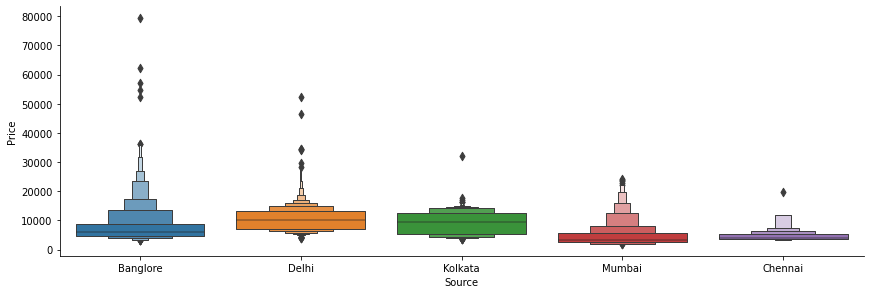

In [190]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

<function matplotlib.pyplot.show>

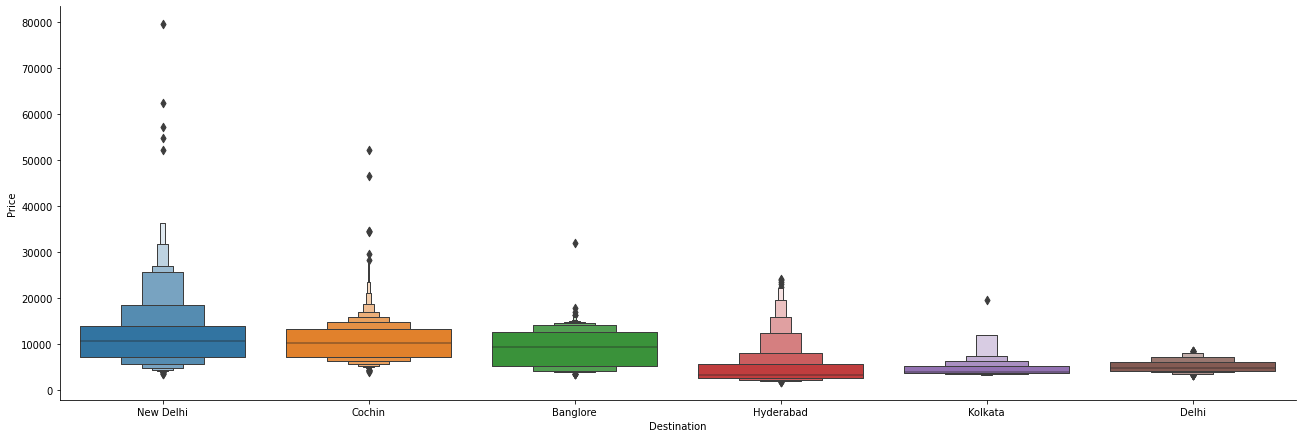

In [191]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

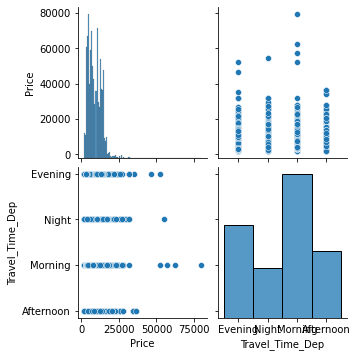

In [192]:
sns.pairplot(data=df,vars=['Price','Travel_Time_Dep'])

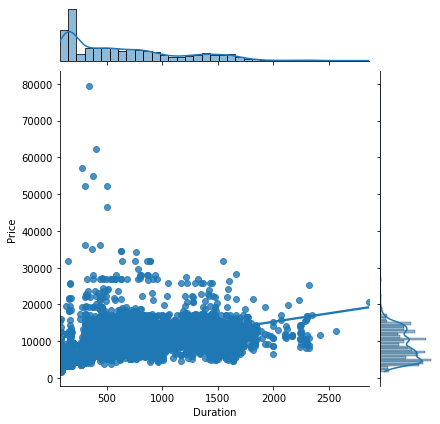

In [193]:
sns.jointplot(x='Duration',y='Price',data=df,kind = 'reg')

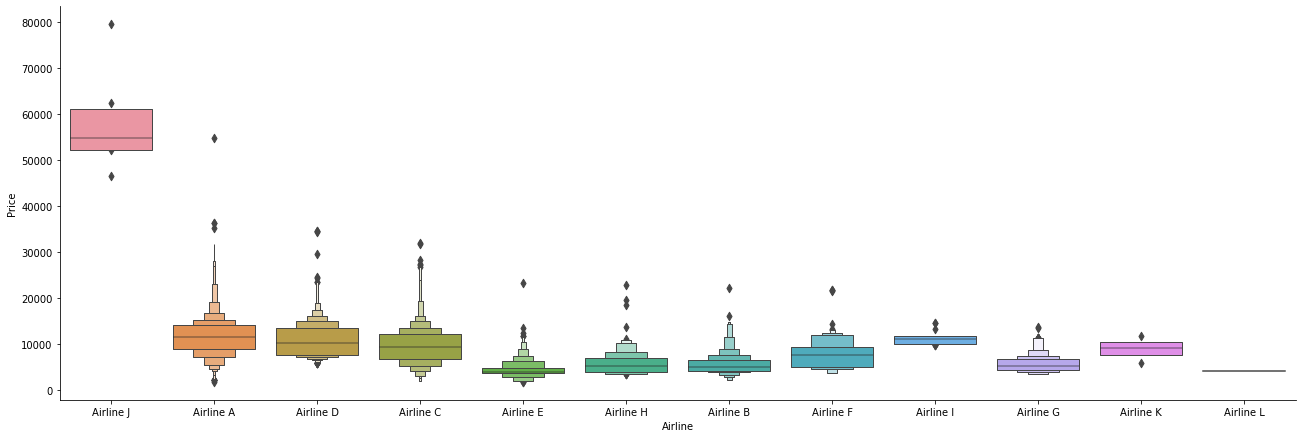

In [194]:
# From graph we can see that Airline J have the highest Price.

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [195]:
df['Journey_Month'].value_counts()

5    2597
6    2575
3    2029
4     810
Name: Journey_Month, dtype: int64

In [196]:
#assigning month names
df["Journey_Month"]=df["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"})
df['Journey_Month'].value_counts()

May      2597
June     2575
March    2029
April     810
Name: Journey_Month, dtype: int64

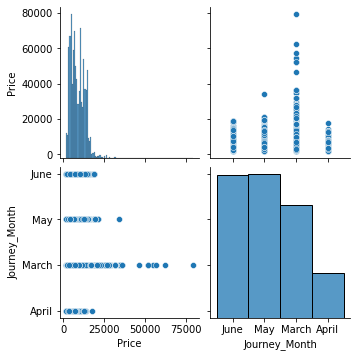

In [197]:
sns.pairplot(data=df,vars=['Price','Journey_Month'])

[Text(0, 0, 'June'),
 Text(0, 0, 'May'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April')]

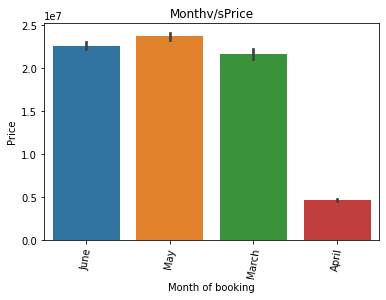

In [198]:
#Journey month v/s total fare
v1=sns.barplot(x='Journey_Month', y='Price', data=df,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

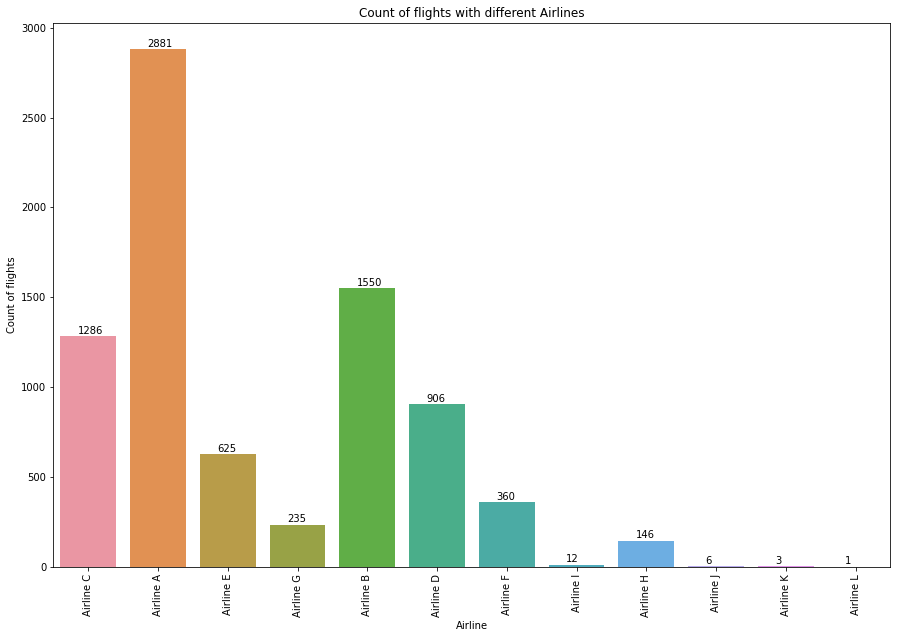

In [199]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

<function matplotlib.pyplot.show>

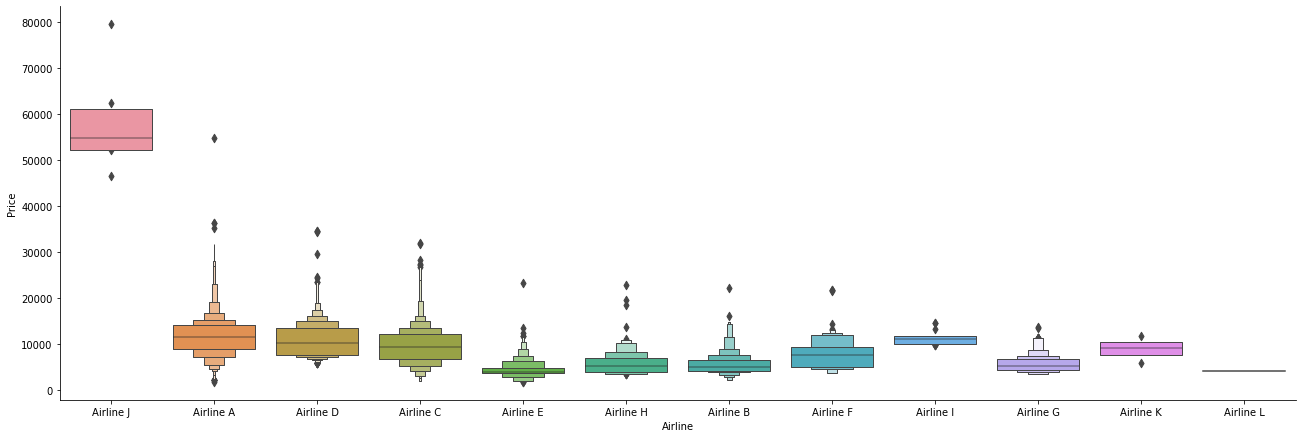

In [200]:
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

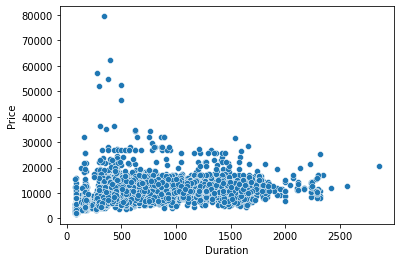

In [201]:
#duration v/s AveragePrice
sns.scatterplot(data=df, x='Duration', y='Price')

[Text(0, 0, 'Evening'),
 Text(0, 0, 'Night'),
 Text(0, 0, 'Morning'),
 Text(0, 0, 'Afternoon')]

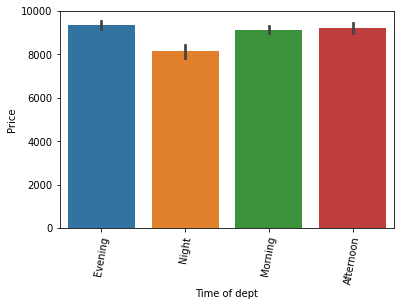

In [202]:
#Deptarure time v/s AveragePrice
v2=sns.barplot(x='Travel_Time_Dep', y='Price', data=df)
v2.set_ylabel('Price')
v2.set_xlabel('Time of dept')
v2.set_xticklabels(v2.get_xticklabels(), rotation=80)

In [203]:
# time of departure v/s count of flights
df.Travel_Time_Dep.value_counts().head(10)


Morning      3266
Evening      2102
Afternoon    1519
Night        1124
Name: Travel_Time_Dep, dtype: int64

[Text(0, 0, 'Morning'),
 Text(0, 0, 'Night'),
 Text(0, 0, 'Evening'),
 Text(0, 0, 'Afternoon')]

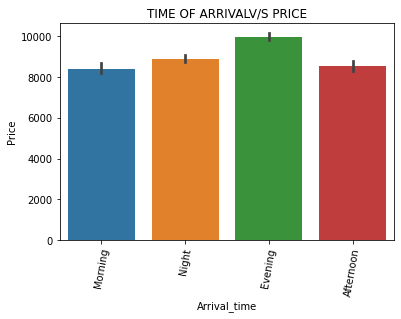

In [204]:
#TIME OF ARRIVAL V/S average price
v3=sns.barplot(x='Travel_Time_Arrival', y='Price', data=df)
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')
v3.set_xticklabels(v3.get_xticklabels(), rotation=80)

[Text(0, 0, '1'), Text(0, 0, '0'), Text(0, 0, '2'), Text(0, 0, '3')]

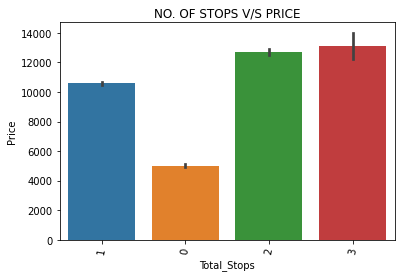

In [205]:
#total stops v/s average price
v4=sns.barplot(x='Total_Stops', y='Price', data=df)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6')]

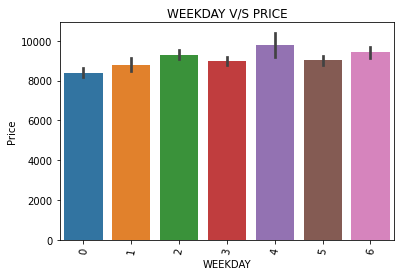

In [206]:
#WEEKDAY V/S average price
v4=sns.barplot(x='weekday', y='Price', data=df)
v4.set_title('WEEKDAY V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('WEEKDAY')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

#Analysis


*  We see that the total count of flight is maximum towards the month-May which can also be concluded from the above bar plot which shows that the sum of fare is maximum in May.This can be due to : Summer vacations in the month of may for schools/colleges, hence most families are also generally going for vacations around this time.


*   The count of flights is lowest on the month of April, this can be because : Schools,colleges have their final exams around this time, offices are mostly busy in the month of April as it is the end of Quarter 1.
*   We see that the average fare price is highest the month of March , this can be because people usually book the fights 2-3 months prior to their date of journey which leads to higher demand and hence higher fare prices.(since the count of tickets booked for travelling in May is the most, prior bookings are done in March)

*   The airfare price range for Bangalore as Source & New Delhi as Destination is the maximum


*   From the Observation we can see that Airline A have the highest price

*   As Observed the Distance or the Duration and the Price there is no such pattern here

*   Early Morning flights are always cheaper and so are midnight flight prices.
Evening flight fares are expensive due to more demand and is the most convenient time to travel for most people.

*   As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.

*   We see that prices are highest on a friday, that may be because this is when airlines start raising prices to make up for the lower prices before and also because weekdays are off for most people so they are mostly travelling to or travelling back.










#Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order --> LabelEncoder is used in this case 

In [207]:
df["Airline"].value_counts()

Airline A    2881
Airline B    1550
Airline C    1286
Airline D     906
Airline E     625
Airline F     360
Airline G     235
Airline H     146
Airline I      12
Airline J       6
Airline K       3
Airline L       1
Name: Airline, dtype: int64

In [208]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline J,Airline_Airline K,Airline_Airline L
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [209]:
df["Source"].value_counts()

Delhi       3397
Kolkata     2152
Banglore    1650
Mumbai       523
Chennai      289
Name: Source, dtype: int64

In [210]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [211]:
df["Destination"].value_counts()

Cochin       3397
Banglore     2152
Delhi         956
New Delhi     694
Hyderabad     523
Kolkata       289
Name: Destination, dtype: int64

In [212]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [213]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'weekday',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Travel_Time_Arrival', 'Travel_Time_Dep'],
      dtype='object')

In [214]:
df["Additional_Info"].value_counts()

No info                         6250
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
No Info                            3
Business class                     3
Change airports                    2
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [215]:
# Additional_Info contains almost 80% no_info
df.drop(["Additional_Info"], axis = 1, inplace = True)

In [216]:
df["Total_Stops"].value_counts()

1    4235
0    2630
2    1112
3      34
Name: Total_Stops, dtype: int64

In [217]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df_train = pd.concat([df, Airline, Source, Destination], axis = 1)

In [218]:
#Dropping the categorical columns
df.drop(["Airline", "Destination","Source"], axis = 1, inplace = True)
df_train.drop(["Airline", "Destination","Source"], axis = 1, inplace = True)

In [219]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'weekday', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Travel_Time_Arrival', 'Travel_Time_Dep'],
      dtype='object')

In [220]:
df_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'weekday', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Travel_Time_Arrival', 'Travel_Time_Dep', 'Airline_Airline B',
       'Airline_Airline C', 'Airline_Airline D', 'Airline_Airline E',
       'Airline_Airline F', 'Airline_Airline G', 'Airline_Airline H',
       'Airline_Airline I', 'Airline_Airline J', 'Airline_Airline K',
       'Airline_Airline L', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8011
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Duration             8011 non-null   int64 
 1   Total_Stops          8011 non-null   object
 2   Price                8011 non-null   int64 
 3   Journey_Day          8011 non-null   int64 
 4   Journey_Month        8011 non-null   object
 5   weekday              8011 non-null   int64 
 6   Dep_hour             8011 non-null   int64 
 7   Dep_min              8011 non-null   int64 
 8   Arrival_hour         8011 non-null   int64 
 9   Arrival_min          8011 non-null   int64 
 10  Travel_Time_Arrival  8011 non-null   object
 11  Travel_Time_Dep      8011 non-null   object
dtypes: int64(8), object(4)
memory usage: 1.1+ MB


In [222]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8011
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Duration               8011 non-null   int64 
 1   Total_Stops            8011 non-null   object
 2   Price                  8011 non-null   int64 
 3   Journey_Day            8011 non-null   int64 
 4   Journey_Month          8011 non-null   object
 5   weekday                8011 non-null   int64 
 6   Dep_hour               8011 non-null   int64 
 7   Dep_min                8011 non-null   int64 
 8   Arrival_hour           8011 non-null   int64 
 9   Arrival_min            8011 non-null   int64 
 10  Travel_Time_Arrival    8011 non-null   object
 11  Travel_Time_Dep        8011 non-null   object
 12  Airline_Airline B      8011 non-null   uint8 
 13  Airline_Airline C      8011 non-null   uint8 
 14  Airline_Airline D      8011 non-null   uint8 
 15  Airline_Airline E    

In [266]:
df_train["Total_Stops"] = df_train["Total_Stops"].astype(int)

In [265]:
df_train["Journey_Month"]=df_train["Journey_Month"].replace({"March":3,"April":4,"May":5,"June":6})

TypeError: ignored

In [267]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8011
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Duration               8011 non-null   float64
 1   Total_Stops            8011 non-null   int64  
 2   Price                  8011 non-null   int64  
 3   Journey_Day            8011 non-null   int64  
 4   Journey_Month          8011 non-null   int64  
 5   weekday                8011 non-null   int64  
 6   Dep_hour               8011 non-null   int64  
 7   Dep_min                8011 non-null   int64  
 8   Arrival_hour           8011 non-null   int64  
 9   Arrival_min            8011 non-null   int64  
 10  Travel_Time_Arrival    8011 non-null   object 
 11  Travel_Time_Dep        8011 non-null   object 
 12  Airline_Airline B      8011 non-null   uint8  
 13  Airline_Airline C      8011 non-null   uint8  
 14  Airline_Airline D      8011 non-null   uint8  
 15  Airl

In [223]:
df_train.shape

(8011, 32)

# Test Data


In [224]:
print("Test data Info")
print("-"*75)
print(df_test.info())

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [225]:
print("Null values :")
print("-"*75)
df_test.dropna(inplace = True)
print(df_test.isnull().sum())

Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [226]:
df_test['Date']=df_test['Date_of_Journey'].str.split('-').str[0]
df_test['Month']=df_test['Date_of_Journey'].str.split('-').str[1]
df_test['Year']=df_test['Date_of_Journey'].str.split('-').str[2]

In [227]:
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [228]:
# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [229]:

# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [230]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Airline B,Delhi,Cochin,DEL → HYD → COK,11h 15m,1 stop,No info,27,03,2019,4,55,16,10
1,Airline E,Kolkata,Banglore,CCU → BLR,2h 20m,non-stop,No info,27,05,2019,22,20,0,40
2,Airline C,Kolkata,Banglore,CCU → IXR → DEL → BLR,14h 35m,2 stops,No info,06,06,2019,5,50,20,25
3,Airline A,Banglore,New Delhi,BLR → MAA → DEL,4h 40m,1 stop,No info,06,03,2019,9,45,14,25
4,Airline B,Delhi,Cochin,DEL → BOM → COK,9h 30m,1 stop,No info,15,06,2019,16,0,1,30


In [231]:
# Duration

def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
df_test['Duration']=df_test['Duration'].apply(duration)

In [232]:
# Categorical data

print("Airline")
print("-"*75)
print(df_test["Airline"].value_counts())
Airline = pd.get_dummies(df_test["Airline"], drop_first= True)

Airline
---------------------------------------------------------------------------
Airline A    968
Airline B    503
Airline C    465
Airline D    290
Airline E    193
Airline F    119
Airline G     84
Airline H     48
Airline I      1
Name: Airline, dtype: int64


In [233]:
print("Source")
print("-"*75)
print(df_test["Source"].value_counts())
Source = pd.get_dummies(df_test["Source"], drop_first= True)

Source
---------------------------------------------------------------------------
Delhi       1139
Kolkata      719
Banglore     547
Mumbai       174
Chennai       92
Name: Source, dtype: int64


In [234]:

print("Destination")
print("-"*75)
print(df_test["Destination"].value_counts())
Destination = pd.get_dummies(df_test["Destination"], drop_first = True)


Destination
---------------------------------------------------------------------------
Cochin       1139
Banglore      719
Delhi         309
New Delhi     238
Hyderabad     174
Kolkata        92
Name: Destination, dtype: int64


In [235]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [236]:
# Replacing Total_Stops
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [237]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
df_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

In [238]:
df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [239]:
print("Shape of test data : ", df_test.shape)

Shape of test data :  (2671, 26)


In [240]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Duration      2671 non-null   object
 1   Total_Stops   2671 non-null   int64 
 2   Date          2671 non-null   object
 3   Month         2671 non-null   object
 4   Year          2671 non-null   object
 5   Dep_hour      2671 non-null   int64 
 6   Dep_min       2671 non-null   int64 
 7   Arrival_hour  2671 non-null   int64 
 8   Arrival_min   2671 non-null   int64 
 9   Airline B     2671 non-null   uint8 
 10  Airline C     2671 non-null   uint8 
 11  Airline D     2671 non-null   uint8 
 12  Airline E     2671 non-null   uint8 
 13  Airline F     2671 non-null   uint8 
 14  Airline G     2671 non-null   uint8 
 15  Airline H     2671 non-null   uint8 
 16  Airline I     2671 non-null   uint8 
 17  Chennai       2671 non-null   uint8 
 18  Delhi         2671 non-null   uint8 
 19  Kolkat

In [241]:
df_test.head()

,Duration,Total_Stops,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline B,Airline C,Airline D,Airline E,Airline F,Airline G,Airline H,Airline I,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,675,1,27,03,2019,4,55,16,10,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,140,0,27,05,2019,22,20,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,875,2,06,06,2019,5,50,20,25,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,280,1,06,03,2019,9,45,14,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,570,1,15,06,2019,16,0,1,30,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [242]:
def deparrtime(tt):
  
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df_test['Dep_Time']=df_test['Dep_hour'].apply(deparrtime)
df_test['Arrival_Time']=df_test['Arrival_hour'].apply(deparrtime)

In [244]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Duration      2671 non-null   object
 1   Total_Stops   2671 non-null   int64 
 2   Date          2671 non-null   object
 3   Month         2671 non-null   object
 4   Year          2671 non-null   object
 5   Dep_hour      2671 non-null   int64 
 6   Dep_min       2671 non-null   int64 
 7   Arrival_hour  2671 non-null   int64 
 8   Arrival_min   2671 non-null   int64 
 9   Airline B     2671 non-null   uint8 
 10  Airline C     2671 non-null   uint8 
 11  Airline D     2671 non-null   uint8 
 12  Airline E     2671 non-null   uint8 
 13  Airline F     2671 non-null   uint8 
 14  Airline G     2671 non-null   uint8 
 15  Airline H     2671 non-null   uint8 
 16  Airline I     2671 non-null   uint8 
 17  Chennai       2671 non-null   uint8 
 18  Delhi         2671 non-null   uint8 
 19  Kolkat

In [245]:
df_test["Duration"] = df_test["Duration"].astype(int)

#Model Building


In [246]:
from sklearn import preprocessing
df_train["Duration"]= (df_train["Duration"] - df_train["Duration"].mean())/df_train["Duration"].std()   #standardizing
df_test["Duration"]= (df_test["Duration"] - df_test["Duration"].mean())/df_test["Duration"].std()

In [256]:
df_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'weekday', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Travel_Time_Arrival', 'Travel_Time_Dep', 'Airline_Airline B',
       'Airline_Airline C', 'Airline_Airline D', 'Airline_Airline E',
       'Airline_Airline F', 'Airline_Airline G', 'Airline_Airline H',
       'Airline_Airline I', 'Airline_Airline J', 'Airline_Airline K',
       'Airline_Airline L', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [268]:
X = df_train.loc[:,['Duration', 'Total_Stops', 'Journey_Day', 'Journey_Month',
       'weekday', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Airline B','Airline_Airline C', 'Airline_Airline D', 'Airline_Airline E',
       'Airline_Airline F', 'Airline_Airline G', 'Airline_Airline H',
       'Airline_Airline I', 'Airline_Airline J', 'Airline_Airline K',
       'Airline_Airline L', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Duration,Total_Stops,Journey_Day,Journey_Month,weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline J,Airline_Airline K,Airline_Airline L,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.245646,1,12,6,2,20,40,9,25,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,-0.899792,0,18,6,1,18,55,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.561629,1,18,5,5,3,50,19,15,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0.186399,1,6,5,0,20,0,8,15,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.613432,1,9,5,3,6,30,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [270]:
y=df_train["Price"]
y.head()

0    7480
1    8016
2    8879
3    9663
4    9663
Name: Price, dtype: int64

In [248]:
X=df_train.drop(["Price"],axis=1)
Y=df_train["Price"]
x=np.array(X)
y=np.array(Y)

In [249]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [271]:
gbm = GradientBoostingRegressor()
xgb = XGBRegressor()

In [272]:
best_gbm = GridSearchCV(gbm, param_grid={'learning_rate':[0.01,0.05,0.1],'max_depth':[1,2,3],'n_estimators':[100,200,500]}, cv=5, n_jobs=-1)
best_xgb = GridSearchCV(xgb, param_grid={'learning_rate':[0.01,0.05,0.1],'max_depth':[1,2,3],'n_estimators':[100,200,500]}, cv=5, n_jobs=-1)

In [273]:
best_gbm.fit(x,y)
best_xgb.fit(x,y)

ValueError: ignored

In [274]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [275]:
print(selection.feature_importances_)

[1.23995371e-01 2.29351437e-01 1.13007501e-01 4.46292770e-02
 3.02359875e-02 2.72985071e-02 2.49769300e-02 2.80638223e-02
 2.26278256e-02 9.84324052e-02 2.75199831e-02 7.46590679e-03
 4.70926535e-02 7.31857203e-03 1.26323533e-02 9.57752582e-03
 1.95404074e-04 8.20282101e-02 7.98757902e-05 6.12742684e-04
 9.47714616e-04 6.65262606e-03 4.04436695e-03 3.96326575e-03
 4.28004756e-03 1.42032700e-02 4.22137064e-03 9.44904485e-04
 2.36001436e-02]


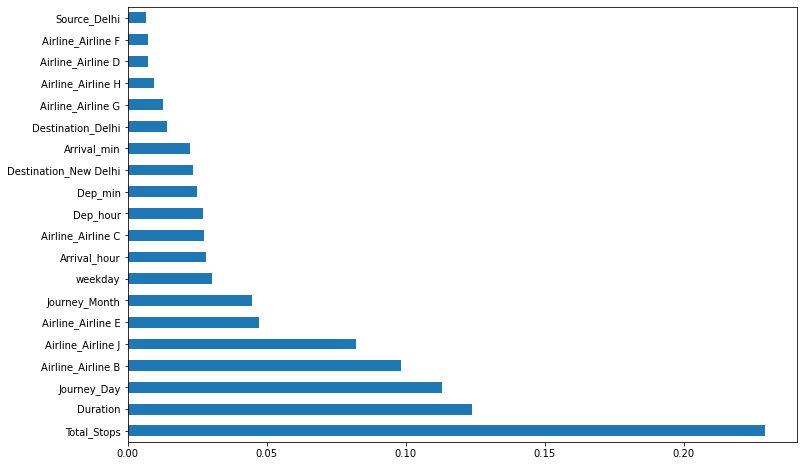

In [276]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [278]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [281]:
y_pred = reg_rf.predict(X_test)

In [282]:
reg_rf.score(X_train, y_train)

0.9606066025687944

In [283]:

reg_rf.score(X_test, y_test)


0.7983322707326429

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


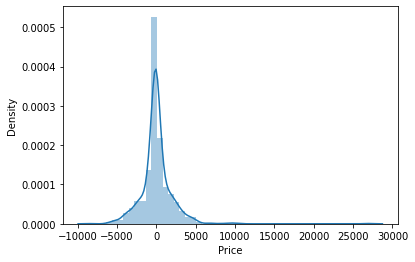

In [284]:
sns.distplot(y_test-y_pred)
plt.show()

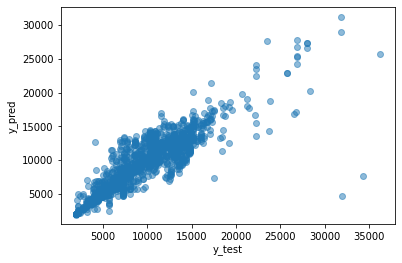

In [285]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [286]:
from sklearn import metrics

In [287]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1212.8428131569683
MSE: 4269709.185953875
RMSE: 2066.327463388578


In [288]:
metrics.r2_score(y_test, y_pred)

0.7983322707326429

#Tuning


In [295]:
from sklearn.model_selection import RandomizedSearchCV

In [296]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [297]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [298]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [299]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [300]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [301]:
prediction = rf_random.predict(X_test)

In [302]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1309.0831423926352
MSE: 4349092.667742415
RMSE: 2085.4478338578538


#Testing the model in df_test

In [308]:
df_test.columns

Index(['Duration', 'Total_Stops', 'Date', 'Month', 'Year', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Airline B', 'Airline C',
       'Airline D', 'Airline E', 'Airline F', 'Airline G', 'Airline H',
       'Airline I', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi', 'Dep_Time', 'Arrival_Time'],
      dtype='object')

In [311]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Duration      2671 non-null   float64
 1   Total_Stops   2671 non-null   int64  
 2   Date          2671 non-null   int64  
 3   Month         2671 non-null   int64  
 4   Year          2671 non-null   int64  
 5   Dep_hour      2671 non-null   int64  
 6   Dep_min       2671 non-null   int64  
 7   Arrival_hour  2671 non-null   int64  
 8   Arrival_min   2671 non-null   int64  
 9   Airline B     2671 non-null   uint8  
 10  Airline C     2671 non-null   uint8  
 11  Airline D     2671 non-null   uint8  
 12  Airline E     2671 non-null   uint8  
 13  Airline F     2671 non-null   uint8  
 14  Airline G     2671 non-null   uint8  
 15  Airline H     2671 non-null   uint8  
 16  Airline I     2671 non-null   uint8  
 17  Chennai       2671 non-null   uint8  
 18  Delhi         2671 non-null 

In [310]:
df_test["Date"] = df_test["Date"].astype(int)
df_test["Month"] = df_test["Month"].astype(int)
df_test["Year"] = df_test["Year"].astype(int)

In [312]:
df_test.columns

Index(['Duration', 'Total_Stops', 'Date', 'Month', 'Year', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Airline B', 'Airline C',
       'Airline D', 'Airline E', 'Airline F', 'Airline G', 'Airline H',
       'Airline I', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi', 'Dep_Time', 'Arrival_Time'],
      dtype='object')

In [315]:
df_test1= df_test.loc[:,['Duration', 'Total_Stops', 'Date', 'Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Airline B', 'Airline C',
       'Airline D', 'Airline E', 'Airline F', 'Airline G', 'Airline H',
       'Airline I', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi']]

In [316]:
prediction = rf_random.predict(df_test1)

In [318]:
prediction

array([32925.92801948,  5033.65252619,  9194.98925833, ...,
       28977.42411667,  6963.09951667, 10016.63      ])

In [322]:
submission_file = pd.DataFrame(prediction,columns = ['price'])

In [323]:
submission_file.head()

,price
0,32925.928019
1,5033.652526
2,9194.989258
3,11042.120388
4,28910.771333


In [324]:
submission_file.to_csv('submission_file.csv', index=True)